<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/Graph1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

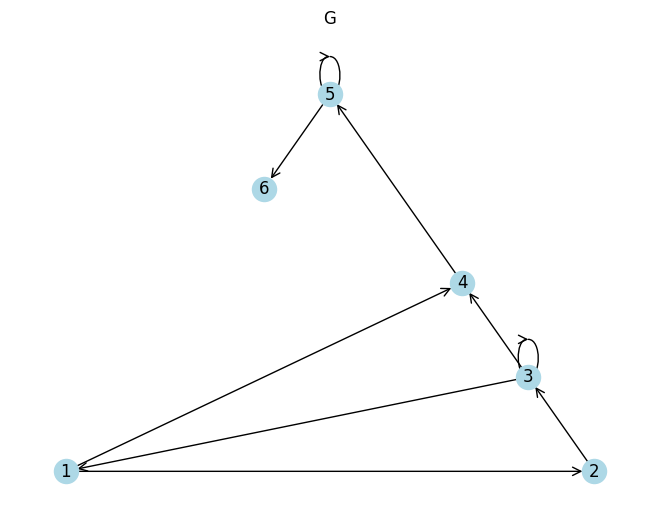

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# ایجاد گراف جهت‌دار
G = nx.DiGraph()

# رئوس
vertices = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(vertices)

# یال‌ها
edges = [
    (1, 2), (2, 3), (3, 1),
    (1, 4), (4, 5), (5, 6),(5,5),(3,3),
    (3, 4)
]
G.add_edges_from(edges)

# رسم گراف
pos = nx.planar_layout(G)  # چینش مسطح
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        arrows=True, arrowstyle='->', arrowsize=15)
plt.title("G")
plt.show()

In [ ]:
import numpy as np


adj_matrix = np.zeros((6, 6), dtype=int)

# پر کردن ماتریس بر اساس یال‌ها
for (u, v) in edges:
    adj_matrix[u-1][v-1] = 1

# نمایش ماتریس
print("ماتریس مجاورت گراف:")
print(adj_matrix)

ماتریس مجاورت گراف:
[[0 1 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 1 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]]


In [ ]:

# محاسبه درجه خروجی هر راس
out_degree = {v: 0 for v in vertices}
for (u, v) in edges:
    out_degree[u] += 1

# ایجاد ماتریس انتقال (۶x۶)
P = np.zeros((6, 6))

# پر کردن ماتریس انتقال
for (u, v) in edges:
    P[u-1][v-1] = 1 / out_degree[u]  # چون پایتون ایندکس از ۰ شروع می‌شود

# نمایش ماتریس انتقال
print("ماتریس انتقال (P):")
print(P)

ماتریس انتقال (P):
[[0.         0.5        0.         0.5        0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.         0.         0.        ]]


In [ ]:
import numpy as np


alpha = 0.85
n = 6


# ماتریس اتصال یکنواخت (Teleportation)
teleport = np.ones((n, n)) / n

# محاسبه ماتریس Pα
P_alpha = alpha * P + (1 - alpha) * teleport

# نمایش ماتریس Pα
print(f"ماتریس انتقال پیج رنک (P_alpha) با آلفا = {alpha}:")
print(np.round(P_alpha, 4))

ماتریس انتقال پیج رنک (P_alpha) با آلفا = 0.85:
[[0.025  0.45   0.025  0.45   0.025  0.025 ]
 [0.025  0.025  0.875  0.025  0.025  0.025 ]
 [0.3083 0.025  0.3083 0.3083 0.025  0.025 ]
 [0.025  0.025  0.025  0.025  0.875  0.025 ]
 [0.025  0.025  0.025  0.025  0.45   0.45  ]
 [0.025  0.025  0.025  0.025  0.025  0.025 ]]


In [ ]:
alpha = float(input("مقدار آلفا را وارد کنید (مثلا 0.85): "))

n = 6



P_alpha = alpha * P + (1 - alpha) * np.ones((n, n)) / n
print(f"P_alpha با آلفا = {alpha}:\n", np.round(P_alpha, 4))

مقدار آلفا را وارد کنید (مثلا 0.85): .86
P_alpha با آلفا = 0.86:
 [[0.0233 0.4533 0.0233 0.4533 0.0233 0.0233]
 [0.0233 0.0233 0.8833 0.0233 0.0233 0.0233]
 [0.31   0.0233 0.31   0.31   0.0233 0.0233]
 [0.0233 0.0233 0.0233 0.0233 0.8833 0.0233]
 [0.0233 0.0233 0.0233 0.0233 0.4533 0.4533]
 [0.0233 0.0233 0.0233 0.0233 0.0233 0.0233]]


In [ ]:


# محاسبه مقادیر ویژه و بردارهای ویژه
eigenvalues, eigenvectors = np.linalg.eig(P_alpha.T)

# ماتریس قطری D
D = np.diag(eigenvalues)

# ماتریس V (بردارهای ویژه به صورت ستونی)
V = eigenvectors

# معکوس V
V_inv = np.linalg.inv(V)

# بررسی صحت تجزیه: P_alpha^T ≈ V D V^{-1}
reconstructed = (V @ D @ V_inv).real

print("مقادیر ویژه:\n", np.round(eigenvalues, 4))
print("\nبردارهای ویژه (ستون‌ها):\n", np.round(V, 4))
print("\nماتریس قطری D:\n", np.round(D, 4))
print("\nبررسی صحت تجزیه (P_alpha^T ≈ V D V^{-1}):\n", np.round(reconstructed, 4))

مقادیر ویژه:
 [ 0.8206+0.j     -0.1559+0.3994j -0.1559-0.3994j -0.0979+0.j
  0.2229+0.1107j  0.2229-0.1107j]

بردارهای ویژه (ستون‌ها):
 [[-1.818e-01+0.j      1.325e-01+0.3042j  1.325e-01-0.3042j
   4.070e-02+0.j      5.330e-02+0.0178j  5.330e-02-0.0178j]
 [-1.564e-01+0.j      2.520e-01-0.2287j  2.520e-01+0.2287j
  -7.000e-04+0.j      1.150e-02+0.0146j  1.150e-02-0.0146j]
 [-3.457e-01+0.j     -4.787e-01+0.j     -4.787e-01-0.j
   4.690e-02+0.j      1.112e-01+0.0453j  1.112e-01-0.0453j]
 [-2.771e-01+0.j      3.684e-01+0.0695j  3.684e-01-0.0695j
  -1.380e-01+0.j      1.494e-01+0.0044j  1.494e-01-0.0044j]
 [-7.385e-01+0.j     -3.117e-01-0.3238j -3.117e-01+0.3238j
   2.579e-01+0.j     -3.989e-01-0.2162j -3.989e-01+0.2162j]
 [-4.481e-01+0.j     -1.728e-01+0.4153j -1.728e-01-0.4153j
  -9.542e-01+0.j     -8.682e-01+0.j     -8.682e-01-0.j    ]]

ماتریس قطری D:
 [[ 0.8206+0.j      0.    +0.j      0.    +0.j      0.    +0.j
   0.    +0.j      0.    +0.j    ]
 [ 0.    +0.j     -0.1559+0.3994j  0.  

In [ ]:
import numpy as np

class BinaryPolynomial:
    def __init__(self, coefficients):
        self.coefficients = coefficients
        self.degree = len(coefficients) - 1

    def __str__(self):
        terms = []
        for power, coeff in enumerate(self.coefficients):
            if coeff == 1:
                if power == 0:
                    terms.append("1")
                elif power == 1:
                    terms.append("x")
                else:
                    terms.append(f"x^{power}")
        return " + ".join(terms) if terms else "0"

def generate_nonconstant_polynomials(n, num_polynomials=50):

    if n < 1:
        raise ValueError("درجه چندجمله‌ای باید حداقل ۱ باشد!")

    polynomials = []
    while len(polynomials) < num_polynomials:
        coefficients = np.random.randint(0, 2, size=n+1)

        # بررسی غیرثابت بودن: حداقل یک ضریب غیرصفر برای توان >=1 داشته باشد.
        if sum(coefficients[1:]) > 0:
            poly = BinaryPolynomial(coefficients)
            polynomials.append(poly)

    return polynomials


n =10
nonconstant_polynomials = generate_nonconstant_polynomials(n)

# نمایش ۵ چندجمله‌ای اول
print("نمونه‌ای از چندجمله‌های تصادفی **غیرثابت**:")
for i, poly in enumerate(nonconstant_polynomials[:5], 1):
    print(f"چندجمله‌ای {i}: {poly}")

نمونه‌ای از چندجمله‌های تصادفی **غیرثابت**:
چندجمله‌ای 1: x + x^2 + x^3 + x^6 + x^8 + x^9 + x^10
چندجمله‌ای 2: x + x^2 + x^5 + x^6 + x^9
چندجمله‌ای 3: x + x^2 + x^3 + x^6 + x^7 + x^9
چندجمله‌ای 4: 1 + x + x^3 + x^5
چندجمله‌ای 5: 1 + x + x^2 + x^6 + x^7


In [17]:
from numpy.linalg import eigvals



# کلاس BinaryPolynomial
class BinaryPolynomial:
    def __init__(self, coefficients):
        self.coefficients = coefficients
        self.degree = len(coefficients) - 1

    def __str__(self):
        terms = []
        for power, coeff in enumerate(self.coefficients):
            if coeff == 1:
                if power == 0:
                    terms.append("1")
                elif power == 1:
                    terms.append("x")
                else:
                    terms.append(f"x^{power}")
        return " + ".join(terms) if terms else "0"


In [18]:
# تابع محاسبه h(P_alpha)
def evaluate_poly_on_matrix(P, poly):
    n = P.shape[0]
    hP = np.zeros((n, n))
    for power, coeff in enumerate(poly.coefficients):
        if coeff == 1:
            hP += np.linalg.matrix_power(P, power)
    return hP


In [19]:
   # تولید 50 چندجمله‌ای غیرثابت تصادفی
n = 10  # درجه چندجمله‌ای
polynomials = []
while len(polynomials) < 50:
    coeffs = np.random.randint(0, 2, size=n+1)
    if sum(coeffs[1:]) > 0:  # شرط غیرثابت بودن
        polynomials.append(BinaryPolynomial(coeffs))


In [20]:




# محاسبه قدر مطلق مقادیر ویژه برای هر چندجمله‌ای
abs_eigenvalues = []
for poly in polynomials:
    hP = evaluate_poly_on_matrix(P_alpha, poly)
    evals = eigvals(hP)
    abs_evals = np.abs(evals)  # محاسبه قدر مطلق
    abs_eigenvalues.append(abs_evals)



In [21]:
# نمایش نتایج برای 5 چندجمله‌ای اول
print("قدر مطلق مقادیر ویژه برای 5 چندجمله‌ای اول:\n")
for i, (poly, evals) in enumerate(zip(polynomials[:5], abs_eigenvalues[:5]), 1):
    print(f"چندجمله‌ای {i}: {poly}")
    print("قدر مطلق مقادیر ویژه:", np.round(evals, 4))
    print("بزرگترین مقدار:", np.round(max(evals), 4))
    print()

قدر مطلق مقادیر ویژه برای 5 چندجمله‌ای اول:

چندجمله‌ای 1: x + x^2 + x^5 + x^7 + x^9 + x^10
قدر مطلق مقادیر ویژه: [2.4236 0.4079 0.4079 0.3053 0.3053 0.0884]
بزرگترین مقدار: 2.4236

چندجمله‌ای 2: 1 + x + x^9
قدر مطلق مقادیر ویژه: [1.9893 0.9337 0.9337 1.2279 1.2279 0.9021]
بزرگترین مقدار: 1.9893

چندجمله‌ای 3: x^3 + x^4 + x^7 + x^9 + x^10
قدر مطلق مقادیر ویژه: [1.5635e+00 1.8900e-02 1.8900e-02 8.0000e-04 7.5200e-02 7.5200e-02]
بزرگترین مقدار: 1.5635

چندجمله‌ای 4: x + x^4 + x^6 + x^7 + x^8 + x^10
قدر مطلق مقادیر ویژه: [2.1737 0.4557 0.4557 0.2494 0.2494 0.0979]
بزرگترین مقدار: 2.1737

چندجمله‌ای 5: x^3 + x^6 + x^7 + x^8 + x^9
قدر مطلق مقادیر ویژه: [1.4826e+00 8.3800e-02 8.3800e-02 1.5400e-02 1.5400e-02 9.0000e-04]
بزرگترین مقدار: 1.4826



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eigvals

def evaluate_poly_on_matrix(P, coeffs):
    """Evaluate polynomial with given coefficients on matrix P"""
    n = P.shape[0]
    hP = np.zeros((n, n))
    for power, coeff in enumerate(coeffs):
        if coeff == 1:
            hP += np.linalg.matrix_power(P, power)  # Add P^power if coefficient is 1
    return hP

In [24]:
# 2. Generate 50 random non-constant binary polynomials (degree = 3)
n_degree = 3  # Degree of polynomials
num_polynomials = 50  # Number of polynomials to generate
polynomials_coeffs = []  # Store coefficients of generated polynomials

while len(polynomials_coeffs) < num_polynomials:
    # Generate random binary coefficients [c0, c1, c2, c3] for 1 + x + x^2 + x^3
    coeffs = np.random.randint(0, 2, size=n_degree + 1)

    # Ensure polynomial is non-constant (at least one x^k term where k >= 1)
    if sum(coeffs[1:]) > 0:
        polynomials_coeffs.append(coeffs)

In [25]:
# 3. Compute absolute eigenvalues and store in matrix (columns = polynomials)
abs_eigenvalues_matrix = np.zeros((6, num_polynomials))  # 6 eigenvalues × 50 polynomials

for i, coeffs in enumerate(polynomials_coeffs):
    # Compute h(P_alpha) for current polynomial
    hP = evaluate_poly_on_matrix(P_alpha, coeffs)

    # Calculate eigenvalues and take absolute values
    evals = eigvals(hP)
    abs_eigenvalues_matrix[:, i] = np.abs(evals)  # Store in column i

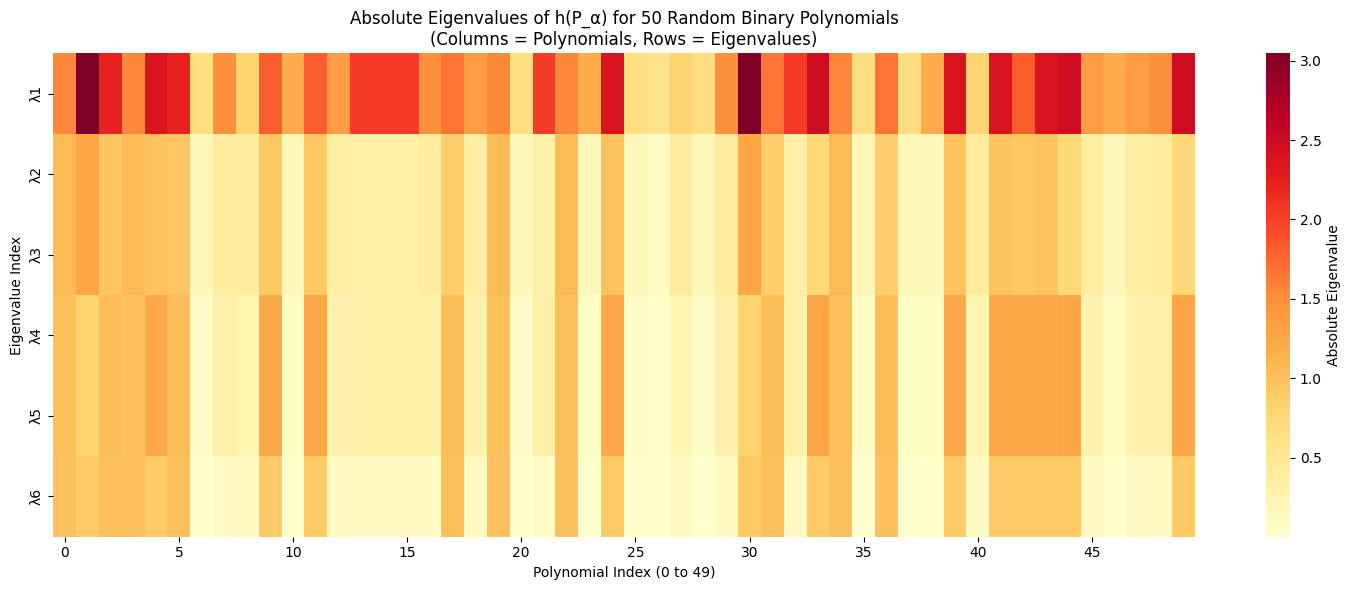

In [26]:


# 4. Plot heatmap of absolute eigenvalues
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(
    abs_eigenvalues_matrix,
    cmap="YlOrRd",  # Yellow-Orange-Red color scale
    annot=False,     # Don't show values in cells (too dense)
    cbar_kws={'label': 'Absolute Eigenvalue'},
    yticklabels=[f"λ{i+1}" for i in range(6)],  # Eigenvalue labels (λ1 to λ6)
    xticklabels=5    # Show x-axis label every 5 polynomials
)

plt.xlabel("Polynomial Index (0 to 49)")
plt.ylabel("Eigenvalue Index")
plt.title("Absolute Eigenvalues of h(P_α) for 50 Random Binary Polynomials\n(Columns = Polynomials, Rows = Eigenvalues)")
plt.tight_layout()

# Save high-resolution image
plt.savefig("eigenvalues_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()